In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [62]:
train = pd.read_csv("./211027_santander/train.csv")
test =  pd.read_csv("./211027_santander/test.csv")
sub =  pd.read_csv("./211027_santander/sample_submission.csv")

train.shape, test.shape, sub.shape

((76020, 371), (75818, 370), (75818, 2))

In [63]:
train.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [64]:
test.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=370)

* 우리가 예측할 레이블('TARGET')이 된다
* 370개의 대부분의 피처가 익명처리가 되어 있다
* 고객의 불만족, 만족의 예측 모델을 만들어서, 불만족 고객을 식별하는 데 목표가 있다

In [8]:
import seaborn as sns

In [9]:
train['TARGET'].unique #이진 분류

<bound method Series.unique of 0        0
1        0
2        0
3        0
4        0
        ..
76015    0
76016    0
76017    0
76018    0
76019    0
Name: TARGET, Length: 76020, dtype: int64>

In [10]:
train['TARGET'].value_counts() 

0    73012
1     3008
Name: TARGET, dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


* float64: 실수형 -111개 컬럼, int64: 정수형 -260개

<AxesSubplot:xlabel='TARGET', ylabel='count'>

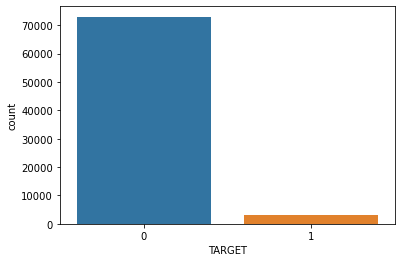

In [12]:
sns.countplot(x="TARGET", data=train)

In [13]:
unsatified = train['TARGET'].value_counts()[1]
unsatified/train['TARGET'].count()   #비울

0.0395685345961589

In [14]:
train.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [15]:
train.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [16]:
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [17]:
train['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 218           1
 215           1
 151           1
 87            1
 191           1
Name: var3, Length: 208, dtype: int64

### 결측치 또는 이상치 발생 시,
    * 없애버리기
    * 값이 너무 큰 경우, (가장 큰 값)
    * 값이 너무 작은 경우. (가장 작은 값)
    * 빈 값 - 왜 비어 있는 값이 발생했는가? 데이터를 누락했다. 앞의 데이터로 결측치를 채우거나, 또는 앞의 7일 정도 데이터로 채우거나
    * 빈 값 - 평균값, 최빈값, 중앙값으로 채우기
    * 이상치만을 예측하는 모델 만들어서 채운다

In [18]:
### 컬럼 중에 가장 많이 나온 값으로 대체하기
train['var3'].replace(-999999, 2, inplace=True)

In [19]:
### ID열을 제외
train = train.loc[ : , 'var3':]
train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [25]:
summary = train.describe()
type(summary)

print( summary.loc["min", :].min(), summary.loc["min", :].max() )
print( summary.loc["max", :].min(), summary.loc["max", :].max() )
print( summary.loc["count", :].min(), summary.loc["count", :].max() )
print( summary.loc["mean", :].min(), summary.loc["mean", :].max() )

-4942.26 5163.75
0.0 9999999999.0
76020.0 76020.0
0.0 48671402.235872336


In [26]:
train['var3'].value_counts()

2      74281
8        138
9        110
3        108
1        105
       ...  
136        1
200        1
229        1
165        1
191        1
Name: var3, Length: 207, dtype: int64

In [28]:
### 컬럼 중에 가장 많이 나온 값으로 대체하기
train['var3'].replace(-999999, 2, inplace=True)

In [27]:
### 10열을 제외
train = train.loc[ : , 'var3':]
train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [29]:
from sklearn.model_selection import train_test_split

In [49]:
### 데이터 나누기
X= train.iloc[: , :-1]
y = train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2,
                                                   random_state=0)

In [50]:
# 레이블 분포비율
print( "학습용 레이블 분포 비율 : \n" , y_train.value_counts() / y_train.count() )
print( "테스트용 레이블 분포 비율 : \n" , y_train.value_counts() / y_train.count() )

학습용 레이블 분포 비율 : 
 0    0.960964
1    0.039036
Name: TARGET, dtype: float64
테스트용 레이블 분포 비율 : 
 0    0.960964
1    0.039036
Name: TARGET, dtype: float64


In [51]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [52]:
from sklearn.metrics import roc_auc_score

In [53]:
xgb_model = XGBClassifier(n_estimators = 500, random_state=77)
xgb_model

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=77, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [54]:
xgb_model.fit(X_train, y_train, 
              early_stopping_rounds=100,
              eval_metric='auc', 
              eval_set=[(X_train, y_train), (X_test, y_test)] )

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85831	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88238	validation_1-auc:0.84101
[17]	validation_0-auc:0.88354	validation_1-auc:0.84071
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=77,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
# 0, 1
# 0이 될 확률, 1이 될 확률
X_test.shape

(15204, 369)

In [56]:
pred_prob = xgb_model.predict_proba(X_test)[:, 1]
pred_prob[0:10]

array([0.00643863, 0.02387667, 0.01260844, 0.01592306, 0.01641693,
       0.00643863, 0.00618323, 0.01146051, 0.02199604, 0.0668072 ],
      dtype=float32)

In [57]:
xgb_roc_score = roc_auc_score(y_test, pred_prob, average='macro')
print("ROC AUC : {0: 4f}".format(xgb_roc_score))

ROC AUC :  0.841349


### 하이퍼 파라미터 튜닝

* max_depth, min_child_weight, colsample_bytree
* 2~3개 최적화, 최적 파라미터 중심으로 1-2개 파라미터를 결합 수행

In [60]:
from sklearn.model_selection import GridSearchCV

xgb_model1 = XGBClassifier(n_estimators=100, rnadom_state=77)

params = {
    "max_depth" : [3,5,7],
    "min_child_weight" : [1,3],
    "colsample_bytree" : [0.3, 0.5, 0.75]
}

gridcv = GridSearchCV(xgb_model1, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, 
          early_stopping_rounds=30,
          eval_metric='auc',
          eval_set = [(X_trian, y_train), (X_test, y_test)])

NameError: name 'X_trian' is not defined

In [59]:
print("GridSearchCV 최적 파라미터 :", gridcv.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
pred_prob = gridcv.predict_proba(X_test)[:, 1]
xgb_roc_score = roc_auc_score(y_test, pred_prov, average='macro')
print("ROC AUC : {0:4f}".format(xgb))